In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('linear_model.csv')

In [3]:
data.head() #verimizin ilk 5 satırı

,x,y
0,82.583220,134.907414
1,73.922466,134.085180
2,34.887445,NaN
3,61.839983,114.530638
4,16.775940,31.376437


In [4]:
data.shape #veri seti 100 satır ve 2 sütun içeriyor

(100, 2)

In [5]:
data.describe() #Veri kümesinin istatistiksel ayrıntıları

,x,y
count,100.000000,92.000000
mean,52.099330,87.915132
std,29.416763,47.093222
min,0.016737,-6.236295
25%,29.012087,47.682375
50%,55.255856,93.547792
75%,77.442040,130.866392
max,99.432294,166.164544


In [6]:
data.isnull().sum() #veri setinde eksik veri var mı

x    0
y    8
dtype: int64

In [7]:
data.y.fillna(value=data.y.mean(),inplace=True) #eksik verileri Y değerlerinin ortalamaları ile dolduruyoruz.

In [8]:
data.isnull().sum() #tekrar eksik veri var mı diye bakıyoruz

x    0
y    0
dtype: int64

#### Verilerin Hazırlanması

Verileri "öznitelikler" ve "etiketler" olarak bölüyoruz.
Öznitelikler bağımsız değişkenlerdir (X), 
Etiketler ise tahmin edilecek bağımlı değişkenlerdir (Y). 
M2 göre bağlı olarak fiyatları tahmin etmek istiyoruz.
Bu nedenle,özellik setimiz "M2" sütunundan oluşacak ve etiket "Fiyat" sütunu olacaktır. 

In [9]:
X = data[['x']] #Öznitelikler 

In [10]:
y = data[['y']] #Etiket

#### Fiyat ve M2 arasındaki ilişkilerin dağılımı

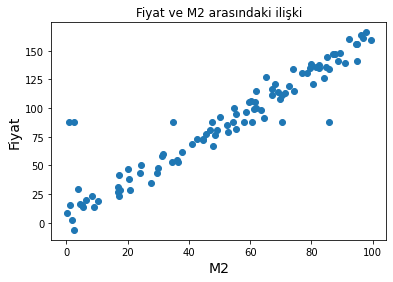

In [11]:
plt.scatter(X, y)
plt.title('Fiyat ve M2 arasındaki ilişki')
plt.xlabel('M2', fontsize=14)
plt.ylabel('Fiyat', fontsize=14)
plt.show()

Verileri eğitim ve test setlerine bölüyoruz. 
Aşağıdaki komut, verilerin 75'ini eğitim setine ayırırken, verilerin 25'sini test setine ayırır. 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

Algoritmanın Eğitimi

In [14]:
# Lineer regresyon modelini inşa edelim.

In [15]:
from sklearn.linear_model import LinearRegression 

In [16]:
linear = LinearRegression()

In [17]:
#x_trainden y_traini öğrenelim. fit() metodunu kullanarak modelimizi eğitiyoruz.


In [18]:
linear.fit(X_train,y_train)

LinearRegression()

#### Tahmin Yapmak

Tahmin için test verilerimizi kullanacağız.
Test datasıyla modelimize tahmin ürettiriyoruz.

In [19]:
y_pred = linear.predict(X_test) 
print(y_pred)

[[135.51758531]
 [ 41.57645802]
 [ 91.16078312]
 [ 41.29909907]
 [138.81425779]
 [126.42950167]
 [101.30238458]
 [130.41970973]
 [ 36.4358937 ]
 [132.19937855]
 [104.57696792]
 [ 81.46149725]
 [152.89026803]
 [ 15.32200159]
 [ 15.6348617 ]
 [ 36.35853765]
 [ 64.34292853]
 [ 88.98292675]
 [ 78.3849206 ]
 [ 83.72289688]
 [ 71.51985707]
 [131.87514926]
 [150.2812943 ]
 [ 19.94315861]
 [ 92.47494913]]


#### Algoritmanın Değerlendirilmesi


Regresyon algoritmaları için yaygın olarak üç değerlendirme ölçütü kullanılır.
Ortalama Mutlak Hata- MAE-(Mean Absolute Error),hataların mutlak değerinin ortalamasıdır. 
Ortalama Kare Hata -MSE-(Mean Squared Error), karesel hataların ortalamasıdır.
Ortalama Karesel Hatanın Karekökü -RMSE-(Root Mean Square Error), karesel hataların ortalamasının kareköküdür.

In [20]:
from sklearn import metrics 

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9.09990357951721
Mean Squared Error: 269.09406931397564
Root Mean Squared Error: 16.40408696983699


In [22]:
#beta 1 katsayımız-bağımsız değişkenlerin katsayısı-The coefficients
print('Coefficients: \n', linear.coef_)

Coefficients: 
 [[1.45638661]]


In [23]:
#sabitimiz beta0
print('intercept:\n',linear.intercept_)

intercept:
 [11.92628287]


In [24]:
#modelin test verisi üzerindeki doğruluk değeri
linear.score(X_test,y_test)

0.8716515929362718

In [25]:
#modelin eğitim verisindeki performansı
linear.score(X_train,y_train)

0.9060926209633025

In [26]:
#R-Kare (R2): Verilerin yerleştirilmiş regresyon çizgisine ne kadar yakın olduğunun istatistiksel bir ölçüsüdür. 

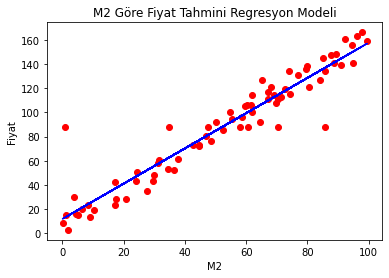

In [27]:
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = linear.predict(X_train)
plt.plot(X_train, modelin_tahmin_ettigi_y, color = 'blue')
plt.title('M2 Göre Fiyat Tahmini Regresyon Modeli')
plt.xlabel('M2')
plt.ylabel('Fiyat')
plt.show()

In [30]:
yeni_veri = [[84]]

In [31]:
linear.predict(yeni_veri)

array([[134.26275825]])